# Feature_Extraction

## 1. load data

In [4]:
import pandas as pd
import numpy as np

In [5]:
df_train = pd.read_csv('data/train_new_tukeyfence_exp.csv', sep=',', encoding='cp949')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114955 entries, 0 to 114954
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      114955 non-null  int64  
 1   X2      114955 non-null  float64
 2   X3      114955 non-null  float64
 3   X4      114955 non-null  float64
 4   X5      114955 non-null  object 
 5   X6      114955 non-null  int64  
 6   X7      114955 non-null  int64  
 7   X8      114955 non-null  object 
 8   Y1      114955 non-null  int64  
 9   Y2      114955 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 8.8+ MB


## 2. Preprocessing

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [7]:
df_train["X8"] = df_train["X8"].str.replace(pat='PL', repl='', regex=True)
df_train["X8"] = df_train["X8"].str.replace(pat='PS', repl='', regex=True)
df_train = df_train.astype({'X8':'int'})

In [8]:
mt_mean = df_train.groupby('X5')['Y1'].mean()
ct_mean = df_train.groupby('X5')['Y2'].mean()

In [9]:
mtmachine_mean = df_train.groupby('X8')['Y1'].mean()
ctmachine_mean = df_train.groupby('X8')['Y2'].mean()

In [10]:
mtworkspace_mean = df_train.groupby('X7')['Y1'].mean()
ctworkspace_mean = df_train.groupby('X7')['Y2'].mean()

In [11]:
df_train['X5_mt'] = df_train['X5'].map(mt_mean)
df_train['X5_ct'] = df_train['X5'].map(ct_mean)

In [12]:
df_train['X8_mt'] = df_train['X8'].map(mtmachine_mean)
df_train['X8_ct'] = df_train['X8'].map(ctmachine_mean)

In [13]:
df_train['X7_mt'] = df_train['X7'].map(mtworkspace_mean)
df_train['X7_ct'] = df_train['X7'].map(ctworkspace_mean)

<AxesSubplot:>

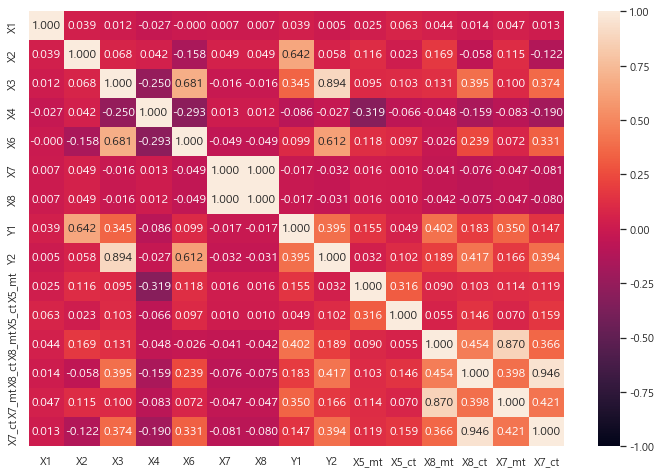

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df_train.corr(), annot=True, fmt = '.3f', vmin = -1, vmax = 1)

## 3. VIF(Variance Inflation Factors)

In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['Feature'] = X_train.columns
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    return vif


### 1) Y1

In [21]:
vif = feature_engineering_XbyVIF(df_train[['X2', 'X8_mt', 'X7_mt','X3','X5_mt','X4']])
print(vif)

  Feature  VIF_Factor
0      X2    3.920559
1   X8_mt   83.797542
2   X7_mt  105.158866
3      X3    3.289605
4   X5_mt   33.914724
5      X4   12.841500


In [24]:
vif = feature_engineering_XbyVIF(df_train[['X2','X8_mt','X3','X5_mt']])
print(vif)

  Feature  VIF_Factor
0      X2    3.877579
1   X8_mt   19.032786
2      X3    3.159293
3   X5_mt   20.049691


In [25]:
vif = feature_engineering_XbyVIF(df_train[['X2','X8_mt','X3']])
print(vif)

  Feature  VIF_Factor
0      X2    3.696856
1   X8_mt    5.319574
2      X3    3.035482


In [26]:
vif = feature_engineering_XbyVIF(df_train[['X2','X5_mt','X3']])
print(vif)

  Feature  VIF_Factor
0      X2    3.782448
1   X5_mt    5.603794
2      X3    3.113392


### 2) Y2

In [27]:
vif = feature_engineering_XbyVIF(df_train[['X3', 'X6', 'X8_ct', 'X7_ct','X5_ct','X4']])
print(vif)

  Feature  VIF_Factor
0      X3    7.111851
1      X6    3.410723
2   X8_ct  141.342487
3   X7_ct  155.411552
4   X5_ct   32.136144
5      X4   15.726553


In [28]:
vif = feature_engineering_XbyVIF(df_train[['X3','X6', 'X8_ct','X5_ct', 'X4']])
print(vif)

  Feature  VIF_Factor
0      X3    6.433302
1      X6    2.786674
2   X8_ct   14.155720
3   X5_ct   29.696292
4      X4   15.707818


In [29]:
vif = feature_engineering_XbyVIF(df_train[['X3','X6', 'X8_ct','X5_ct']])
print(vif)

  Feature  VIF_Factor
0      X3    6.424566
1      X6    2.691025
2   X8_ct   14.139992
3   X5_ct   12.118548


In [31]:
vif = feature_engineering_XbyVIF(df_train[['X3','X6', 'X8_ct','X4']])
print(vif)

  Feature  VIF_Factor
0      X3    6.385731
1      X6    2.760959
2   X8_ct    9.546682
3      X4    6.410092
